# Pulsar Classification Project Proposal
###### By Bernie Leung, Phillip Li, Glen Ren, and Helena Tremblay

### Introduction (Phillip)

### Methods & Results (Bernie & Glen)
#### Load Data from Original Source on Web

In [2]:
library(tidyverse)
library(repr)
library(readxl)
library(tidymodels)

# in order to underfit our data, we load a new library with the tools to do so, called caret
library(caret)

set.seed(2022)

pulsar_data <- read_csv("https://raw.githubusercontent.com/glenren/dsci_100_group_24/main/HTRU_2.csv", 
                        col_names = c("mean_int_prof", 
                                      "sd_int_prof",
                                      "kurt_int_prof",
                                      "skew_int_prof",
                                      "mean_curve",
                                      "sd_curve",
                                      "kurt_curve",
                                      "skew_curve",
                                      "class") ) %>%
                        mutate(class = as_factor(class))

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

#### Wrangling and Cleaning Data

In [10]:
set.seed(2022) 

# in order to address the skew in our data, we will use an overfitted or underfitted data set to perform our data analysis
# we will perform exploratory data analyses on overfitted and underfitted data sets in order to determine which one has the highest accuracy

pulsar <- which(pulsar_data$class=="1") # making a list of all the entries with Class = 1 (a.k.a. true pulsars)
false <- which(pulsar_data$class=="0")# making a list of all the entries with Class = 0 (a.k.a. false pulsar candidates)
length(pulsar)
length(false)
# here we can see how many observations of each category we have

[1] 1639

[1] 16259

As we have 1639 true pulsars, and 16259 false candidates, we can see that our two classes are heavily imbalanced. We can solve this by refitting our data, either by 1. underfitting, which is to reduce the majority class to the size of the minority class, or 2. overfitting, which is to increased the minority class to the size of the majority class. Of course, there are drawbacks to both methods: underfitting leads to loss of information from the minority class, and the duplication of the minority class in overfitting can lead to our classifier seeming more accurate than it really is.

In [14]:
# create an underfitted data set
down <- c(sample(false,length(pulsar)),pulsar)
# here we are making a new vector combining the true pulsars and a new random sample of false candidates that has the same length as true pulsars
length(down) # the total amount of observations we have in the "down" vector, we can see
pulsar_down <- pulsar_data[down,] # create new pulsar_data dataframe including the indices in "down" (our underfitted data set)
summary(pulsar_down) # we can see a summary of our new underfitted data set
#looking at the class variable, we see we have an even

# create an overfitted data set
up <- c(sample(pulsar,length(false),replace=TRUE),false)
# here we are making a new vector combining the true pulsars and a new random sample of true candidates that has the same length as false candidates
# by having replace = TRUE, we allow the sample to create new variables of class 1 (true pulsars)
length(up) # the total amount of observations we have in "up" list
pulsar_up <- pulsar_data[up,] # Create new dataframe with including the indices in "down"
summary(pulsar_up)

[1] 3278

 mean_int_prof      sd_int_prof    kurt_int_prof     skew_int_prof     
 Min.   :  5.812   Min.   :24.77   Min.   :-1.8760   Min.   :-1.59365  
 1st Qu.: 54.268   1st Qu.:36.51   1st Qu.: 0.1870   1st Qu.: 0.09644  
 Median : 95.371   Median :43.25   Median : 0.6373   Median : 1.32986  
 Mean   : 86.501   Mean   :42.97   Mean   : 1.6744   Mean   : 7.98329  
 3rd Qu.:117.646   3rd Qu.:48.94   3rd Qu.: 2.9646   3rd Qu.:11.62334  
 Max.   :192.617   Max.   :83.80   Max.   : 8.0695   Max.   :68.10162  
   mean_curve          sd_curve        kurt_curve       skew_curve      
 Min.   :  0.2132   Min.   :  7.37   Min.   :-2.812   Min.   :  -1.949  
 1st Qu.:  2.4640   1st Qu.: 16.98   1st Qu.: 1.640   1st Qu.:   1.636  
 Median :  6.8240   Median : 32.49   Median : 5.184   Median :  27.389  
 Mean   : 29.4187   Mean   : 40.00   Mean   : 5.799   Mean   :  65.768  
 3rd Qu.: 39.8999   3rd Qu.: 62.52   3rd Qu.: 9.067   3rd Qu.:  97.115  
 Max.   :199.5778   Max.   :109.66   Max.   :34.540   Max.

[1] 32518

tibble [32,518 × 9] (S3: tbl_df/tbl/data.frame)
 $ mean_int_prof: num [1:32518] 9.48 68.6 83.86 53.27 76.97 ...
 $ sd_int_prof  : num [1:32518] 36.1 33.7 56.5 32.4 41.4 ...
 $ kurt_int_prof: num [1:32518] 5.54 2.14 1.52 3.77 2.11 ...
 $ skew_int_prof: num [1:32518] 31.16 8.98 1.62 17.97 6.05 ...
 $ mean_curve   : num [1:32518] 112.8 13.3 121.8 44.4 30 ...
 $ sd_curve     : num [1:32518] 46.5 51.1 83 74.5 60.1 ...
 $ kurt_curve   : num [1:32518] 0.816 3.639 -0.507 1.571 2.145 ...
 $ skew_curve   : num [1:32518] 0.808 11.48 -1.42 1.119 3.705 ...
 $ class        : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...


In [6]:
set.seed(2022)

# initial splits for overfitted data and underfitted data
# question: should we add split for unfitted data for comparison?
pulsar_up_split <- initial_split(pulsar_up, prop = 0.75, strata = class)  
pulsar_up_train <- training(pulsar_up_split)   
pulsar_up_test <- testing(pulsar_up_split)

pulsar_down_split <- initial_split(pulsar_down, prop = 0.75, strata = class)  
pulsar_down_train <- training(pulsar_down_split)   
pulsar_down_test <- testing(pulsar_down_split)

In [7]:
set.seed(2022)

# build initial classification to determine which data set to use

# build recipe for overfitted and underfitted data
pulsar_up_recipe <- recipe(class ~ mean_int_prof + mean_curve + skew_curve,
                       data = pulsar_up_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())
pulsar_up_recipe

pulsar_down_recipe <- recipe(class ~ mean_int_prof + mean_curve + skew_curve,
                       data = pulsar_down_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())
pulsar_down_recipe

# create cross-validation for overfitted and underfitted data
pulsar_up_vfold <- vfold_cv(pulsar_up_train, v = 5, strata = class)

pulsar_down_vfold <- vfold_cv(pulsar_down_train, v = 5, strata = class)

# build model 
knn_tune <- nearest_neighbor(weight_func = 'rectangular', neighbors = tune()) %>%
    set_engine('kknn') %>%
    set_mode('classification') 

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          3

Operations:

Scaling for all_predictors()
Centering for all_predictors()

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          3

Operations:

Scaling for all_predictors()
Centering for all_predictors()

In [10]:
set.seed(2022)
# overfitted data set results

knn_up_results <- workflow() %>%
    add_recipe(pulsar_up_recipe) %>%
    add_model(knn_tune) %>%
    tune_grid(resamples = pulsar_up_vfold, grid = 10) %>%
    collect_metrics

# timed out
# question: do we need to add the overfitted data results in our final report? can we just state that it timed out, so we didn't include it? 

In [11]:
set.seed(2022)
# underfitted data set results

knn_down_results <- workflow() %>%
    add_recipe(pulsar_down_recipe) %>%
    add_model(knn_tune) %>%
    tune_grid(resamples = pulsar_down_vfold, grid = 10) %>%
    collect_metrics

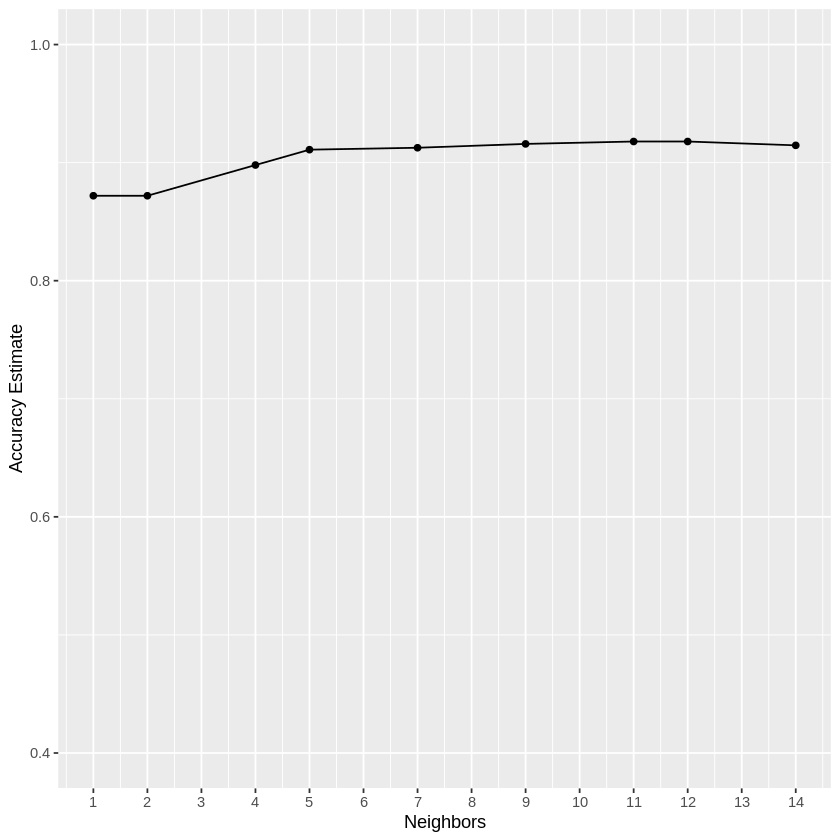

In [12]:
# evaluating classification model with overfitted/underfitted data sets

# accuracies_up <- knn_up_results %>%
#     filter(.metric == "accuracy")
# cross_val_plot_up <- ggplot(accuracies, aes(x= neighbors, y=mean)) +
#     geom_point() +
#     geom_line() +
#     labs(x = "Neighbors", y = "Accuracy Estimate") +
#     scale_x_continuous(breaks = seq(0, 14, by = 1)) +  # adjusting the x-axis
#     scale_y_continuous(limits = c(0.4, 1.0)) # adjusting the y-axis
# cross_val_plot_up

accuracies_down <- knn_down_results %>%
    filter(.metric == "accuracy")
cross_val_plot_down <- ggplot(accuracies_down, aes(x= neighbors, y=mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    scale_x_continuous(breaks = seq(0, 14, by = 1)) +  # adjusting the x-axis
    scale_y_continuous(limits = c(0.4, 1.0)) # adjusting the y-axis
cross_val_plot_down

In [14]:
set.seed(2022)
# used underfitted data set because overfitted data set timed out

knn_spec_down <- nearest_neighbor(weight_func = 'rectangular', neighbors = 12) %>%
    set_engine('kknn') %>%
    set_mode('classification')

pulsar_down_workflow <- workflow() %>%
    add_recipe(pulsar_down_recipe) %>%
    add_model(knn_spec_down)
pulsar_down_workflow

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 12
  weight_func = rectangular

Computational engine: kknn 


In [15]:
set.seed(2022)

# fitting data to workflow
pulsar_down_fit <- pulsar_down_workflow %>%
    fit(data = pulsar_down_train)

pulsar_down_summary <- pulsar_down_fit %>%
    predict(pulsar_down_test) %>%
    bind_cols(pulsar_down_test) %>%
    metrics(truth = class, estimate = .pred_class)
pulsar_down_summary

#check majority class to compare
pulsar_down_proportions <- pulsar_down_train %>%
                      group_by(class) %>%
                      summarize(n = n()) %>%
                      mutate(percent = 100*n/nrow(pulsar_down_train))
pulsar_down_proportions

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9156479
kap,binary,0.8312958


`summarise()` ungrouping output (override with `.groups` argument)



class,n,percent
<fct>,<int>,<dbl>
0,1230,50
1,1230,50


#### Summary of the data set that is relevant for exploratory data analysis related to the planned analysis

#### Visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis

## Perform the data analysis

## Visualization of the analysis 

### Discussion (Helena)